In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Create Linear Layer

In [2]:
def get_linear_layer(
    size,
    activation=None,
    use_time_distributed=False,
    use_bias=True
):
    """
    Returns a Keras Linear Layer
    Args:
        size: Output Size
        activation: Activation function to apply if required
        use_time_distributed: Whether to apply layer across time
        use_bias: Whether bias should be included in the layer
    """
    linear = tf.keras.layers.Dense(
        size, activation=activation, use_bias=use_bias
    )
    if(use_time_distributed):
        linear = tf.keras.layers.TimeDistributed(linear)
    return linear

[[-1.7968342 -1.8526593  0.9295362  2.8141494  2.7691443]
 [-3.4327092  5.2657075  1.674103  -0.9505153  9.330963 ]]


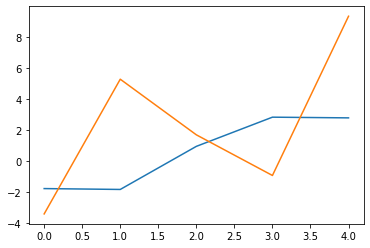

In [3]:
# A vanilla linear layer
rank_1_tensor = tf.constant([[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]])
linear_layer = get_linear_layer(5)
print(linear_layer)
output = linear_layer(rank_1_tensor)
print(output.numpy())
plt.plot(output.numpy()[0])
plt.plot(output.numpy()[1])

[[0.16768783 6.6861205  2.9950352  0.         2.8276193 ]
 [1.1625292  1.517914   1.4914309  5.1015463  0.35785794]]


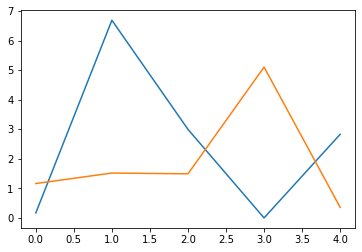

In [4]:
# A ReLU activated lineaar layer function
activation = tf.keras.layers.Activation('relu')
activated_ll = get_linear_layer(5, activation=activation)
print(activated_ll)
output = activated_ll(rank_1_tensor)
print(output.numpy())
plt.plot(output.numpy()[0])
plt.plot(output.numpy()[1])

[[[1.827421   0.         0.         3.5054865  6.1785355 ]
  [0.18982196 0.         0.         0.         0.94396776]]]


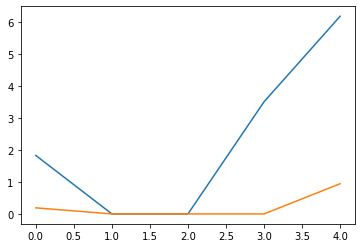

In [5]:
rank_1_tensor = tf.constant([[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]]])

td_activated_ll = get_linear_layer(5, activation=activation, use_time_distributed=True)
print(td_activated_ll)
output = td_activated_ll(rank_1_tensor)
print(output.numpy())
plt.plot(output.numpy()[0][0])
plt.plot(output.numpy()[0][1])

### ELU Activation

ELU activation results in linear behavior by rendering 2 properties
- identity function $\mathbf{W}_{s,\omega} a + \mathbf{W}_{3,\omega} c + \mathcal{b}_{2,\omega} \gg 0$
- constant generator $\mathbf{W}_{2,\omega} a + \mathbf{W}_{3,\omega} c + \mathcal{b}_{2,\omega} \ll 0$

\begin{equation*} 
\left\{ \normalsize
\begin{array}{lrc}
x & \mbox{for} & x \geq 0 \\
\alpha(e^x-1) & \mbox{for} & x < 0
\end{array}\right.
\end{equation*}


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



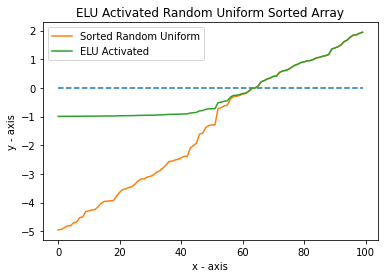

In [34]:
# Create a random uniform array between -5 and 2
uni_array = np.random.uniform(-5,2, [100,])
uni_array_sorted = np.sort(uni_array)
elu_uni_array = tf.keras.layers.Activation('elu')(uni_array_sorted)

plt.plot([0]*100, linestyle='dashed')

plt.plot(uni_array_sorted, label = "Sorted Random Uniform")
plt.plot(elu_uni_array, label = "ELU Activated")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('ELU Activated Random Uniform Sorted Array')
plt.legend()
plt.show()